## Linear Regression from Scratch with Pure Python

## A line can be represented by the formula: $y = mx + b$

![](2022-10-02-21-44-06.png)

![](2022-10-02-21-44-38.png)

![](2022-10-02-21-48-57.png)

Similarly, let’s find the partial derivative with respect to c. Let partial derivative of the Cost function with respect to c be Dc (With little change in c how much Cost function changes).

![](2022-10-02-21-49-36.png)

-------------------

## Now update the current values of m and c using the following equation:

![](2022-10-02-21-50-42.png)
-------------------

## To summarize, the steps are:

* Estimate θ
* Compute cost
* Tweak θ
* Repeat 2 and 3 until you reach convergence.

MSE is  1146.4784002238516
Accuracy is  0.9043244251217009


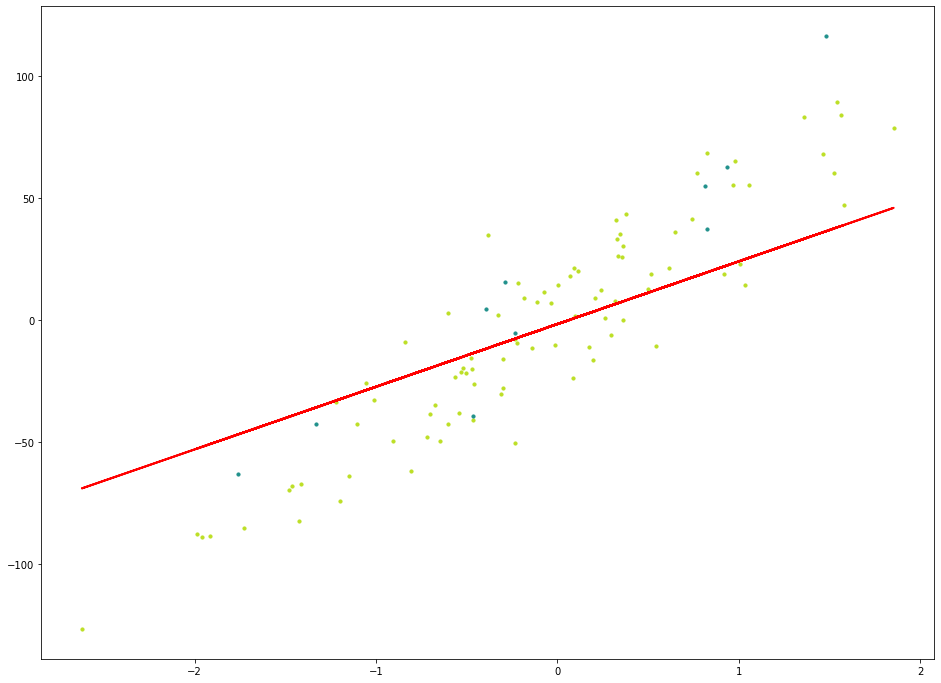

In [3]:
from tkinter import Y
import numpy as np


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate = 0.0001, n_iter = 1000 ):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize the parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        #gradient descent mechanism implementation
        for _ in range(self.n_iter):
            y_predicted = np.dot(X, self.weights) + self.bias

            # now update the slope i.e. the b term
            dw = (1 / n_samples) * np.dot(X.T,  (y_predicted - y) )

            # update the Intercept
            db = ( 1 / n_samples) * np.sum(y_predicted - y)

            #update the full weights and bias values
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approx = np.dot(X, self.weights) + self.bias
        return y_approx


# Test the implementation

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise = 20, random_state = 42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

regressor = LinearRegression(learning_rate=0.001, n_iter=1000)

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print('MSE is ', mse)

accu = r2_score(y_test, predictions)

print('Accuracy is ', accu)


y_pred_line = regressor.predict(X)

cmap = plt.get_cmap("viridis")

fig = plt.figure(figsize=(16, 12))

m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s = 10 )

m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s=10)

plt.plot(X, y_pred_line, color = 'red', linewidth = 2, label = "Predictions")

plt.show()


